In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, time
import glob
import pickle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Load the Dataset

In [2]:
# German Traffic Sign Recognition Benchmark dataset
training_path = "./dataset/Final_Training/"
test_path = "./dataset/Final_Test/"

train_file = training_path + "train.p"
test_file = test_path + "test.p"

train_list = []
train_list = glob.glob(training_path + "**/**/*.ppm")
train_label = glob.glob(training_path + "**/**/*.csv")

test_list = []
test_list = glob.glob(test_path + "**/*.ppm")
test_label = glob.glob(test_path + "*.csv")

In [3]:
train_list = sorted(train_list)
train_list

['./dataset/Final_Training/Images/00000/00000_00000.ppm',
 './dataset/Final_Training/Images/00000/00000_00001.ppm',
 './dataset/Final_Training/Images/00000/00000_00002.ppm',
 './dataset/Final_Training/Images/00000/00000_00003.ppm',
 './dataset/Final_Training/Images/00000/00000_00004.ppm',
 './dataset/Final_Training/Images/00000/00000_00005.ppm',
 './dataset/Final_Training/Images/00000/00000_00006.ppm',
 './dataset/Final_Training/Images/00000/00000_00007.ppm',
 './dataset/Final_Training/Images/00000/00000_00008.ppm',
 './dataset/Final_Training/Images/00000/00000_00009.ppm',
 './dataset/Final_Training/Images/00000/00000_00010.ppm',
 './dataset/Final_Training/Images/00000/00000_00011.ppm',
 './dataset/Final_Training/Images/00000/00000_00012.ppm',
 './dataset/Final_Training/Images/00000/00000_00013.ppm',
 './dataset/Final_Training/Images/00000/00000_00014.ppm',
 './dataset/Final_Training/Images/00000/00000_00015.ppm',
 './dataset/Final_Training/Images/00000/00000_00016.ppm',
 './dataset/Fi

In [4]:
sorted(test_list)

['./dataset/Final_Test/Images/00000.ppm',
 './dataset/Final_Test/Images/00001.ppm',
 './dataset/Final_Test/Images/00002.ppm',
 './dataset/Final_Test/Images/00003.ppm',
 './dataset/Final_Test/Images/00004.ppm',
 './dataset/Final_Test/Images/00005.ppm',
 './dataset/Final_Test/Images/00006.ppm',
 './dataset/Final_Test/Images/00007.ppm',
 './dataset/Final_Test/Images/00008.ppm',
 './dataset/Final_Test/Images/00009.ppm',
 './dataset/Final_Test/Images/00010.ppm',
 './dataset/Final_Test/Images/00011.ppm',
 './dataset/Final_Test/Images/00012.ppm',
 './dataset/Final_Test/Images/00013.ppm',
 './dataset/Final_Test/Images/00014.ppm',
 './dataset/Final_Test/Images/00015.ppm',
 './dataset/Final_Test/Images/00016.ppm',
 './dataset/Final_Test/Images/00017.ppm',
 './dataset/Final_Test/Images/00018.ppm',
 './dataset/Final_Test/Images/00019.ppm',
 './dataset/Final_Test/Images/00020.ppm',
 './dataset/Final_Test/Images/00021.ppm',
 './dataset/Final_Test/Images/00022.ppm',
 './dataset/Final_Test/Images/0002

In [5]:
train_df = pd.concat([pd.read_csv(label, delimiter=";") for label in train_label])
train_df = train_df.sort_values(['ClassId','Filename'])
train_df

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000_00000.ppm,29,30,5,6,24,25,0
1,00000_00001.ppm,30,30,5,5,25,25,0
2,00000_00002.ppm,30,30,5,5,25,25,0
3,00000_00003.ppm,31,31,5,5,26,26,0
4,00000_00004.ppm,30,32,5,6,25,26,0
5,00000_00005.ppm,31,31,6,6,26,26,0
6,00000_00006.ppm,33,34,6,6,28,28,0
7,00000_00007.ppm,34,35,6,6,29,30,0
8,00000_00008.ppm,33,34,5,5,28,29,0
9,00000_00009.ppm,36,36,6,5,30,30,0


In [6]:
test_df = pd.concat([pd.read_csv(label, delimiter=";") for label in test_label])
test_df = test_df.sort_values(['Filename'])
test_df

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000.ppm,53,54,6,5,48,49,16
1,00001.ppm,42,45,5,5,36,40,1
2,00002.ppm,48,52,6,6,43,47,38
3,00003.ppm,27,29,5,5,22,24,33
4,00004.ppm,60,57,5,5,55,52,11
5,00005.ppm,52,56,5,5,47,51,38
6,00006.ppm,147,130,12,12,135,119,18
7,00007.ppm,32,33,5,5,26,28,12
8,00008.ppm,45,50,6,5,40,45,25
9,00009.ppm,81,86,7,7,74,79,35


In [7]:
(x1,y1) = (train_df.iloc[0]['Roi.X1'], train_df.iloc[0]['Roi.Y1'])
(x2,y2) = (train_df.iloc[0]['Roi.X2'], train_df.iloc[0]['Roi.Y2'])
width = x2-x1
height = y2-y1

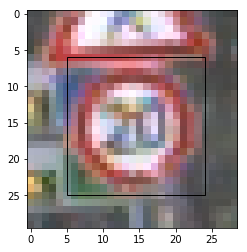

In [8]:
fig,ax = plt.subplots(1)
ax.imshow(mpimg.imread(train_list[0]))
ax.add_patch(patches.Rectangle((x1,y1),width, height, fill=False ))

In [9]:
n_train = len(train_list)
n_test =  len(test_list)
n_class = len(np.bincount(train_df.loc[:,"ClassId"]))

print("Num of train:{}, Num of test:{}, Num of Class:{}".format(n_train, n_test, n_class))

Num of train:39209, Num of test:12630, Num of Class:43


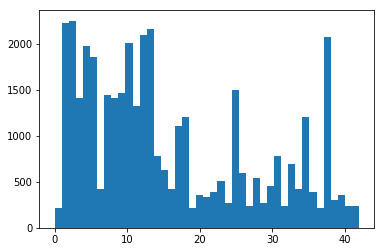

In [10]:
n = plt.hist(train_df.loc[:,'ClassId'], n_class)

In [11]:
def make_train(training_path):
    X_train = []
    y_train = []
    train_list = []
    
    train_list = glob.glob(training_path + "**/**/*.ppm")
    train_label = glob.glob(training_path + "**/**/*.csv")
    
    train_list = sorted(train_list)
    train_df = pd.concat([pd.read_csv(label, delimiter=";") for label in train_label])
    train_df = train_df.sort_values(['ClassId','Filename'])

    for (trainx, trainy) in zip(train_list, train_df['ClassId']):
        X_train.append(mpimg.imread(trainx))
        y_train.append(trainy)
    
    return np.array(X_train), np.array(y_train)
    

In [12]:
def make_test(test_path):
    X_test = []
    y_test = []
    
    test_list = []
    test_list = sorted(glob.glob(test_path + "**/*.ppm"))
    test_label = glob.glob(test_path + "*.csv")
    
    test_df = pd.concat([pd.read_csv(label, delimiter=";") for label in test_label])
    test_df = test_df.sort_values(['Filename'])
    
    for (testx, testy) in zip(test_list, test_df['ClassId']):
        X_test.append(mpimg.imread(testx))
        y_test.append(testy)
        
    return np.array(X_test), np.array(y_test)

In [13]:
X_train, y_train = make_train(training_path=training_path)

X_test, y_test = make_test(test_path=test_path)

In [14]:
with open(train_file, mode='wb') as f:
    pickle.dump((X_train, y_train), f)

with open(test_file, mode='wb') as f:
    pickle.dump((X_test, y_test), f)

# Pre-processing

In [15]:
## Data Augmentation using Keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

Using TensorFlow backend.
